# Introduction
This notebook presents the spectral features used in the `wavely.signal` package.

In [1]:
%matplotlib notebook
%cd -q ../
import numpy as np
from scipy.signal import chirp
import matplotlib.pyplot as plt

from wavely.signal.features.features import FeaturesComputer
from wavely.signal.units.helpers import split_signal

Spectral features in `wavely.signal.features.spectralfeatures` can have 1 or 2 decorators:
- `@feature`: it means that this feature is computed and returned in an instantiated object from `FeaturesComputer`,
- `@noexport`: it means that this feature is computed but is not available in the object.
Let's review the different available spectral features.


In [2]:
block_size = 256
N = 21 * block_size
rate = 96000
window = np.hanning
n_mels = 32
fc = FeaturesComputer(block_size=block_size, rate=rate, window=window, n_mels=n_mels, features="all")
f = [960, 19200]
x = np.sin(2 * np.pi * f[0] * np.arange(0.0, N / rate, 1 / rate)) + \
    np.sin(2 * np.pi * f[1] * np.arange(0.0, N / rate, 1 / rate))
blocks = split_signal(x, rate, block_size / rate)
features = fc.compute(blocks)

/home/maxime/Repositories/signal/wavely/signal/preprocessing/preprocessing.py:701: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  "Empty filters detected in mel frequency basis. "


# Raw spectral features
## Spectrum
The function `spectrum` computes the complex spectrum of `blocks` using the Fast Fourier Transform (FFT). It can be used to display the frequency content of a signal.


<IPython.core.display.Javascript object>


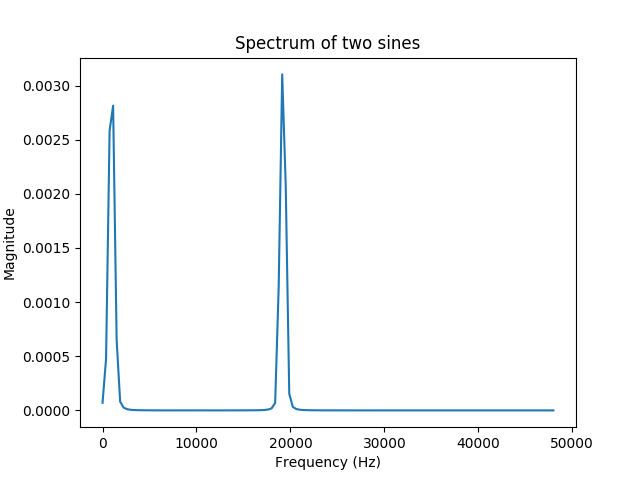

Text(0.5, 1.0, 'Spectrum of two sines')

In [3]:
f_v = np.arange(0.0, rate, rate / block_size)[:block_size // 2 + 1]
plt.figure(1)
plt.clf()
plt.plot(f_v, np.abs(features["spectrum"][0]))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Spectrum of two sines")

## Mel spectrogram
The function `melspectrogram` computes the spectrogram in mel scale of the signal. It requires an extra parameter called `n_mels` which specify the number of Mel coefficients used.

<IPython.core.display.Javascript object>


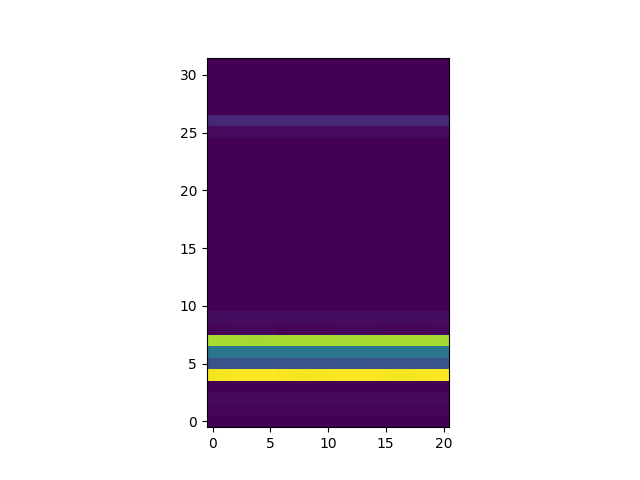

In [4]:
plt.figure(2)
plt.clf()
plt.imshow(features["melspectrogram"].T)
plt.gca().invert_yaxis()

# Aggregated spectral features
## Spectral centroid
The function `spectralcentroid` computes the spectral centroid of the signal. The spectral centroid is the weighted mean of the frequencies in the signal. It is close to the brightness indicator.

<IPython.core.display.Javascript object>


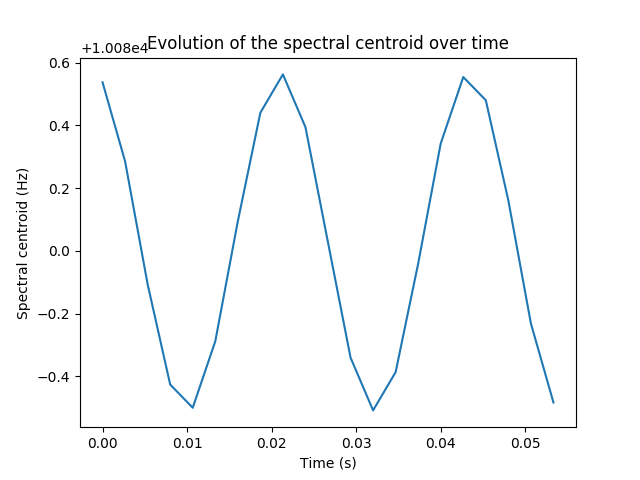

Text(0.5, 1.0, 'Evolution of the spectral centroid over time')

In [5]:
n_frames = features["spectralcentroid"].shape[0]
t_v = np.arange(0.0, N / rate, N / (rate * n_frames))
plt.figure(3)
plt.clf()
plt.plot(t_v, features["spectralcentroid"])
plt.xlabel("Time (s)")
plt.ylabel("Spectral centroid (Hz)")
plt.title("Evolution of the spectral centroid over time")

## Spectral spread
The function `spectralspread` computes the spectral spread of the signal. The spectral spread is the standard deviation of the spectral density computed over the periodogram frequency bins.

<IPython.core.display.Javascript object>


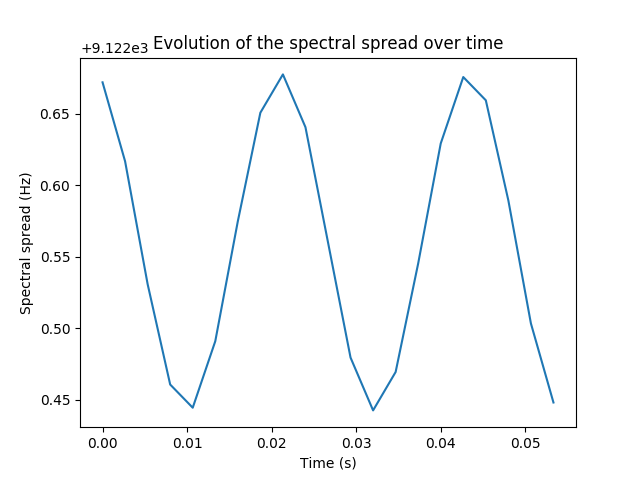

Text(0.5, 1.0, 'Evolution of the spectral spread over time')

In [6]:
n_frames = features["spectralspread"].shape[0]
t_v = np.arange(0.0, N / rate, N / (rate * n_frames))
plt.figure(4)
plt.clf()
plt.plot(t_v, features["spectralspread"])
plt.xlabel("Time (s)")
plt.ylabel("Spectral spread (Hz)")
plt.title("Evolution of the spectral spread over time")

## Spectral skewness
The function `spectralskewness` computes the spectral skewness of the signal. The skewness of a distrubtion is given by
$ \mathbb{E} \left[ \left(\frac{X - \mu}{\sigma} \right)^3 \right] $
where $\mu$ is the centroid and $\sigma$ is the standard deviation, i.e. the square root of the variance.

<IPython.core.display.Javascript object>


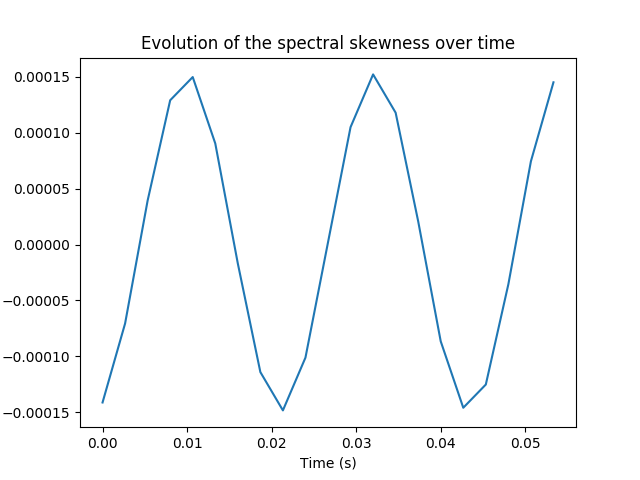

Text(0.5, 1.0, 'Evolution of the spectral skewness over time')

In [7]:
n_frames = features["spectralskewness"].shape[0]
t_v = np.arange(0.0, N / rate, N / (rate * n_frames))
plt.figure(5)
plt.clf()
plt.plot(t_v, features["spectralskewness"])
plt.xlabel("Time (s)")
plt.ylabel("Spectral skewness (Hz)")
plt.title("Evolution of the spectral skewness over time")

## Spectral kurtosis
The function `spectralkurtosis` computes the spectral kurtosis of the signal. The kurtosis of a distrubtion is given by
$ \mathbb{E} \left[ \left(\frac{X - \mu}{\sigma} \right)^4 \right] $
where $\mu$ is the centroid and $\sigma$ is the standard deviation, i.e. the square root of the variance.

<IPython.core.display.Javascript object>


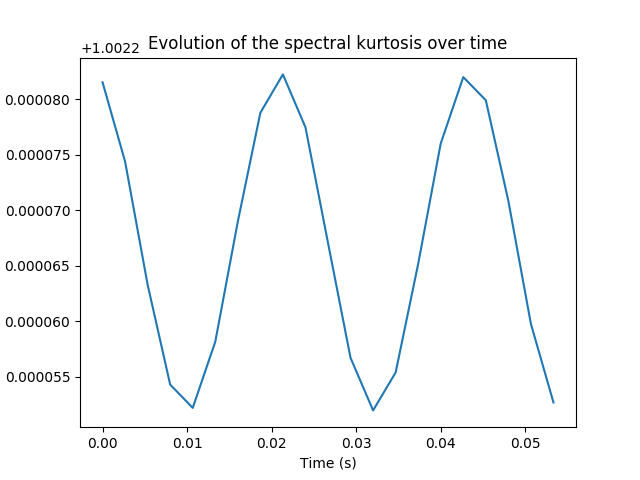

Text(0.5, 1.0, 'Evolution of the spectral kurtosis over time')

In [8]:
n_frames = features["spectralkurtosis"].shape[0]
t_v = np.arange(0.0, N / rate, N / (rate * n_frames))
plt.figure(6)
plt.clf()
plt.plot(t_v, features["spectralkurtosis"])
plt.xlabel("Time (s)")
plt.ylabel("Spectral kurtosis (Hz)")
plt.title("Evolution of the spectral kurtosis over time")

## Spectral flatness
The function `spectralflatness` computes the spectral flatness of the signal. Spectral flatness quantifies how noise-like a sound is, as opposed to being tone-like.

$ SF(t_n) = \frac{\left(\prod_{m=1}^M a_m(t_n)\right)^{1 / M}}{\frac{1}{M} \sum_{m=1}^{M} a_m(t_n)}$

<IPython.core.display.Javascript object>


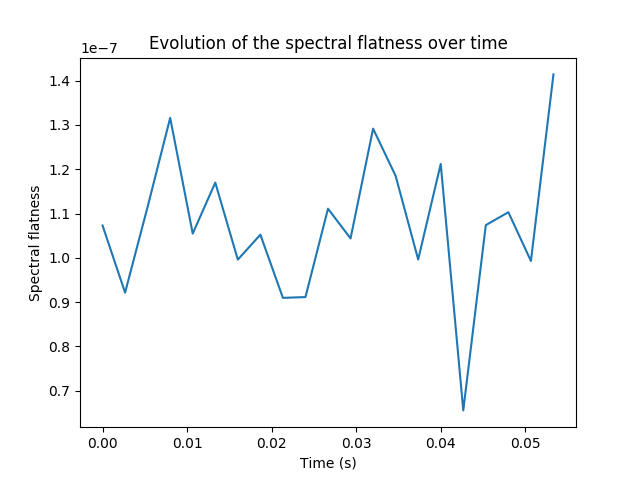

Text(0.5, 1.0, 'Evolution of the spectral flatness over time')

In [9]:
n_frames = features["spectralflatness"].shape[0]
t_v = np.arange(0.0, N / rate, N / (rate * n_frames))
plt.figure(7)
plt.clf()
plt.plot(t_v, features["spectralflatness"])
plt.xlabel("Time (s)")
plt.ylabel("Spectral flatness")
plt.title("Evolution of the spectral flatness over time")

## Spectral crest
The function `spectralcrest` computes the spectral crest of the signal. The crest factor measures the ratio between the power density peak value and the total block power.

$ SC(t_n) = \frac{\max_{m} a_m(t_n)}{\frac{1}{M} \sum_{m=1}^{M} a_m(t_n)} $

<IPython.core.display.Javascript object>


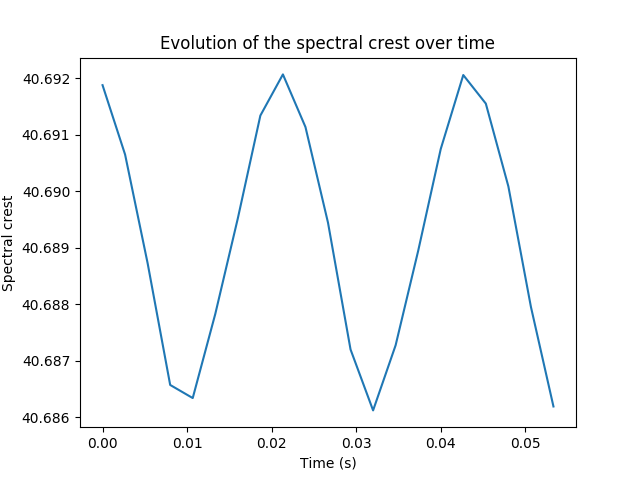

Text(0.5, 1.0, 'Evolution of the spectral crest over time')

In [10]:
n_frames = features["spectralcrest"].shape[0]
t_v = np.arange(0.0, N / rate, N / (rate * n_frames))
plt.figure(8)
plt.clf()
plt.plot(t_v, features["spectralcrest"])
plt.xlabel("Time (s)")
plt.ylabel("Spectral crest")
plt.title("Evolution of the spectral crest over time")

## Spectral entropy
The function `spectralentropy` computes the spectral entropy of the signal. The spectral entropy (SE) of a signal is a measure of its spectral power distribution. The concept is based on the Shannon entropy, or information entropy, in information theory. The SE treats the signal's normalized power distribution in the frequency domain as a probability distribution, and calculates the Shannon entropy of it. The Shannon entropy in this context is the spectral entropy of the signal.

<IPython.core.display.Javascript object>


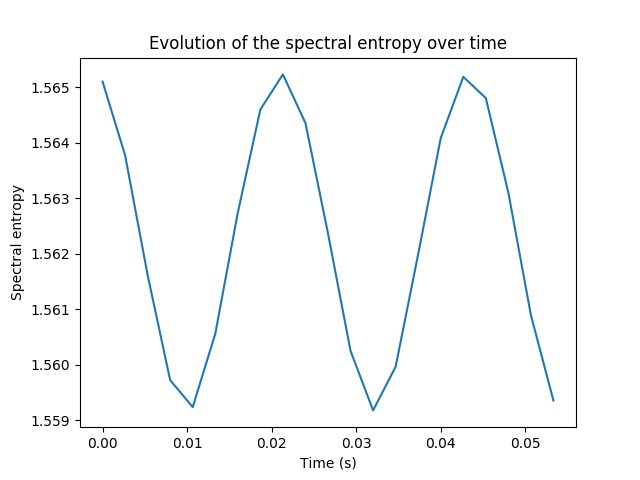

Text(0.5, 1.0, 'Evolution of the spectral entropy over time')

In [11]:
n_frames = features["spectralentropy"].shape[0]
t_v = np.arange(0.0, N / rate, N / (rate * n_frames))
plt.figure(9)
plt.clf()
plt.plot(t_v, features["spectralentropy"])
plt.xlabel("Time (s)")
plt.ylabel("Spectral entropy")
plt.title("Evolution of the spectral entropy over time")

## Spectral flux
The function `spectralflux` computes the spectral flux of the signal. The spectral flux measures the signal amplitude variations over time through an $L_1$ norm. It only detects onsets using a rectifier function.

<IPython.core.display.Javascript object>


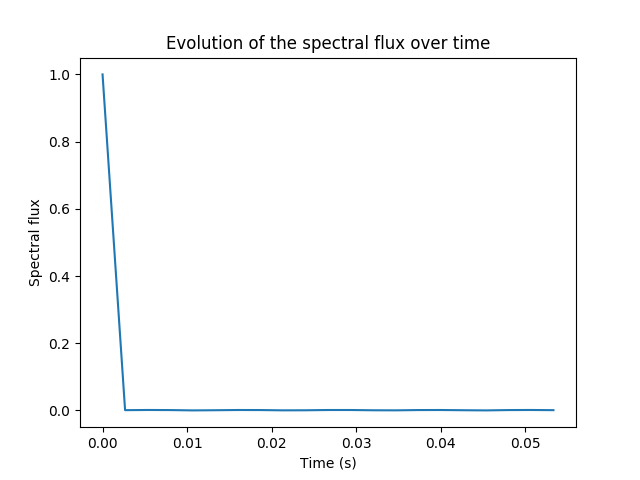

Text(0.5, 1.0, 'Evolution of the spectral flux over time')

In [12]:
n_frames = features["spectralflux"].shape[0]
t_v = np.arange(0.0, N / rate, N / (rate * n_frames))
plt.figure(10)
plt.clf()
plt.plot(t_v, features["spectralflux"])
plt.xlabel("Time (s)")
plt.ylabel("Spectral flux")
plt.title("Evolution of the spectral flux over time")

## Peak frequency
The function `peakfreq` computes the peak frequency of the signal. The peak frequency is associated with the frequency bin with maximum spectral power density.

<IPython.core.display.Javascript object>


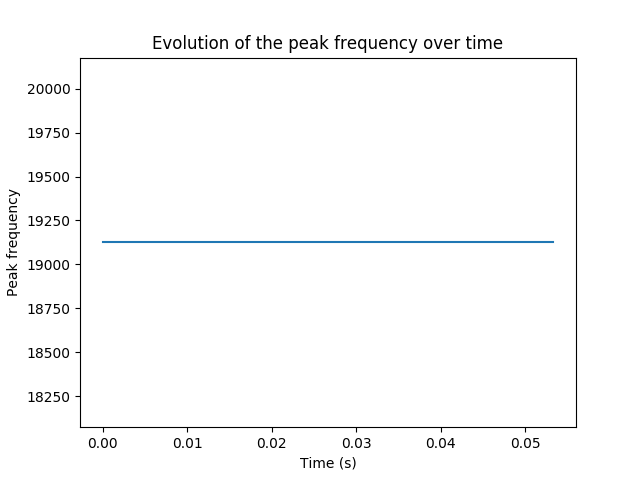

Text(0.5, 1.0, 'Evolution of the peak frequency over time')

In [13]:
n_frames = features["peakfreq"].shape[0]
t_v = np.arange(0.0, N / rate, N / (rate * n_frames))
plt.figure(11)
plt.clf()
plt.plot(t_v, features["peakfreq"])
plt.xlabel("Time (s)")
plt.ylabel("Peak frequency")
plt.title("Evolution of the peak frequency over time")

## High frequency content
The function `highfrequencycontent` computes the high frequency content of the signal. High frequency content is the sum of the amplitudes weighted by the squared frequency. It indicates the energy associated with high frequencies.

<IPython.core.display.Javascript object>


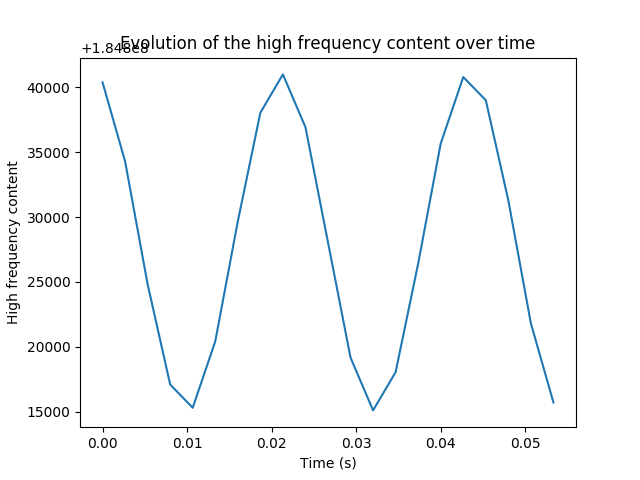

Text(0.5, 1.0, 'Evolution of the high frequency content over time')

In [14]:
n_frames = features["highfrequencycontent"].shape[0]
t_v = np.arange(0.0, N / rate, N / (rate * n_frames))
plt.figure(12)
plt.clf()
plt.plot(t_v, features["highfrequencycontent"])
plt.xlabel("Time (s)")
plt.ylabel("High frequency content")
plt.title("Evolution of the high frequency content over time")

## Spectral irregularity
The function `spectralirregularity` computes the spectral irregularity of the signal. Spectral irregularity is defined as the sum of absolute differences of the power spectral density.

<IPython.core.display.Javascript object>


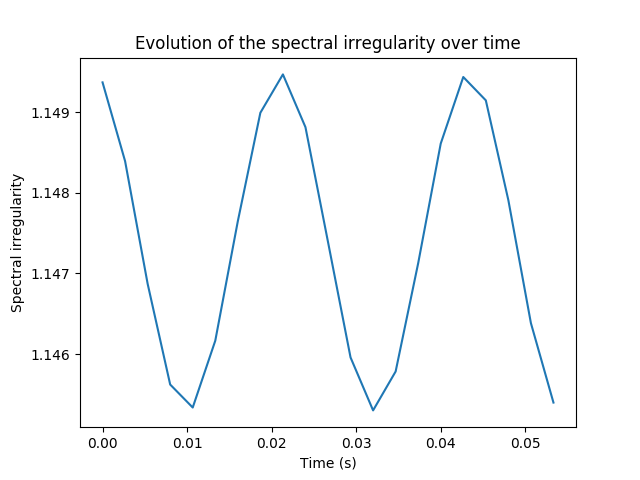

Text(0.5, 1.0, 'Evolution of the spectral irregularity over time')

In [15]:
n_frames = features["spectralirregularity"].shape[0]
t_v = np.arange(0.0, N / rate, N / (rate * n_frames))
plt.figure(13)
plt.clf()
plt.plot(t_v, features["spectralirregularity"])
plt.xlabel("Time (s)")
plt.ylabel("Spectral irregularity")
plt.title("Evolution of the spectral irregularity over time")

## Spectral rolloff
The function `spectralrolloff` computes the spectral rolloff of the signal. Spectral roll-off is defined as the frequency below which 95% of the power spectral density is concentrated. It is hence the 95th percentile of the PSD seen as a distribution.

<IPython.core.display.Javascript object>


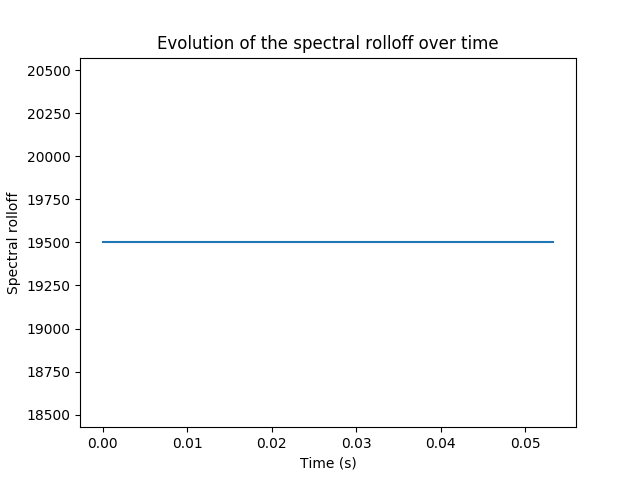

Text(0.5, 1.0, 'Evolution of the spectral rolloff over time')

In [16]:
n_frames = features["spectralrolloff"].shape[0]
t_v = np.arange(0.0, N / rate, N / (rate * n_frames))
plt.figure(14)
plt.clf()
plt.plot(t_v, features["spectralrolloff"])
plt.xlabel("Time (s)")
plt.ylabel("Spectral rolloff")
plt.title("Evolution of the spectral rolloff over time")

## Amplitude envelope, instantaneous phase and frequency
The amplitude envelope is given by magnitude of the analytic signal. The instantaneous frequency can be obtained by differentiating the instantaneous phase in respect to time. The instantaneous phase corresponds to the phase angle of the analytic signal.


In [17]:
duration = 1
fs = 48000
samples = int(fs*duration)
t = np.arange(samples) / fs

We create a chirp of which the frequency increases from 100 Hz to 250 Hz and apply an amplitude modulation.

In [18]:
s = chirp(t, 100, t[-1], 250)
s *= (1.0 + 0.5 * np.sin(2.0*np.pi*3.0*t) )

In [19]:
blocks = split_signal(s, fs, samples / fs)

In [20]:
fc = FeaturesComputer(
    block_size=samples,
    rate=fs,
    features=[
        "amplitude_envelope",
        "instantaneous_phase",
        "instantaneous_frequency",
    ],
)
fc.compute(blocks)

{'amplitude_envelope': array([[1.04033553, 1.03461803, 1.0293293 , ..., 1.05805376, 1.05241714,
         1.04647072]]),
 'instantaneous_frequency': array([[155.66309573, 152.11253025, 149.15473233, ..., 177.63319056,
         173.77998336, 169.48036122]]),
 'instantaneous_phase': array([[-0.27937366, -0.25899741, -0.23908593, ..., -0.3455475 ,
         -0.32279976, -0.30061483]])}

<IPython.core.display.Javascript object>


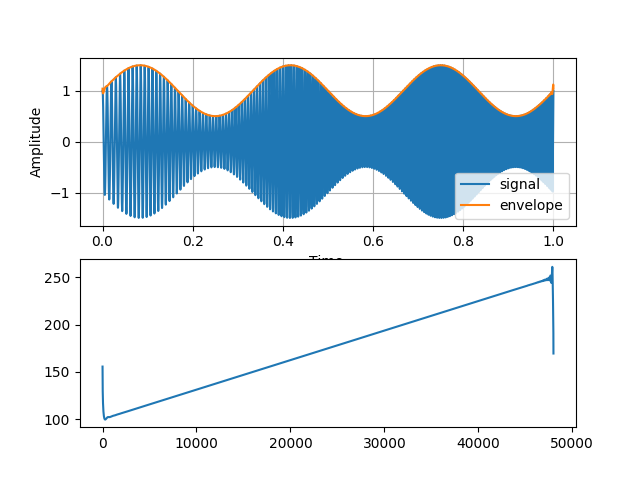

In [21]:
plt.figure()
plt.subplot(211)
plt.plot(t, s.T, label='signal')
plt.plot(t, fc["amplitude_envelope"][0], label='envelope')
plt.ylabel("Amplitude")
plt.xlabel("Time ")
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(fc["instantaneous_frequency"][0])
plt.show()